In [1]:
# prepare data
from data_utils import get_data, session_num
dataset_used = 'MNIST' #'CIFAR10' #'FashionMNIST' #'MNIST', 'MPII', 'UTD'
train_data_loader, val_data_loader, __ = get_data(dataset_used, 1)

Train size:  54000


In [2]:
# load vae model
from vae import MNIST_VAE
import matplotlib.pyplot as plt
import torch 

device = 'cuda'
vae_model = MNIST_VAE(latent_dim=128).to(device)
vae_model_name = 'gr_vae_' + dataset_used + '_' + str(session_num)
vae_model.load_state_dict(torch.load('models/'+vae_model_name+'.pth'))
vae_model.eval();

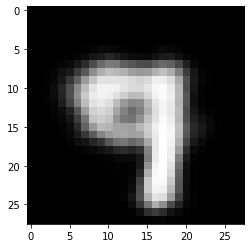

In [3]:
# random sample from latent space

sample = vae_model.sample(sample_num=5)[0].permute(1, 2, 0)
plt.imshow(sample.cpu().detach().numpy(), cmap='gray')
plt.show()

In [4]:
# load main model
from classifier import Classifier

main_model = Classifier(n_class=10).to(device)
main_model_name = 'gr_classifier'+'_'+dataset_used+'_'+str(session_num)
main_model.load_state_dict(torch.load('models/'+main_model_name+'.pth'))
main_model.eval();

In [5]:
correct_num = 0
val_num = 0
for batch in val_data_loader:
    if batch[0] is None:
        continue
    if dataset_used in ['MNIST', 'UTD', 'FashionMNIST', 'CIFAR10']:
        img, label = batch[0].to(device), batch[1].to(device)
#     elif dataset_used == 'MPII':
#         img = batch['image'].to(device)
        
    pred = main_model(img)
    correct_num += label.item() == torch.argmax(pred).item()
    val_num += 1
print('Accuracy: {}'.format(correct_num/val_num))

Accuracy: 0.5268839526676354
